In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_state_mapping = pd.read_excel("/content/dataq5_cy.xlsx",sheet_name='State_Region Mapping')

In [ ]:
df_sales = pd.read_excel("/content/dataq5_cy.xlsx",sheet_name='Sales')

In [ ]:
df_revenue = pd.read_excel("/content/dataq5_cy.xlsx",sheet_name='Revenue')

In [ ]:
#Queue Performance

<ipython-input-5-29526dc1884c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Revenue', hue='Queue', data=df_revenue, ci=None, palette=custom_palette)


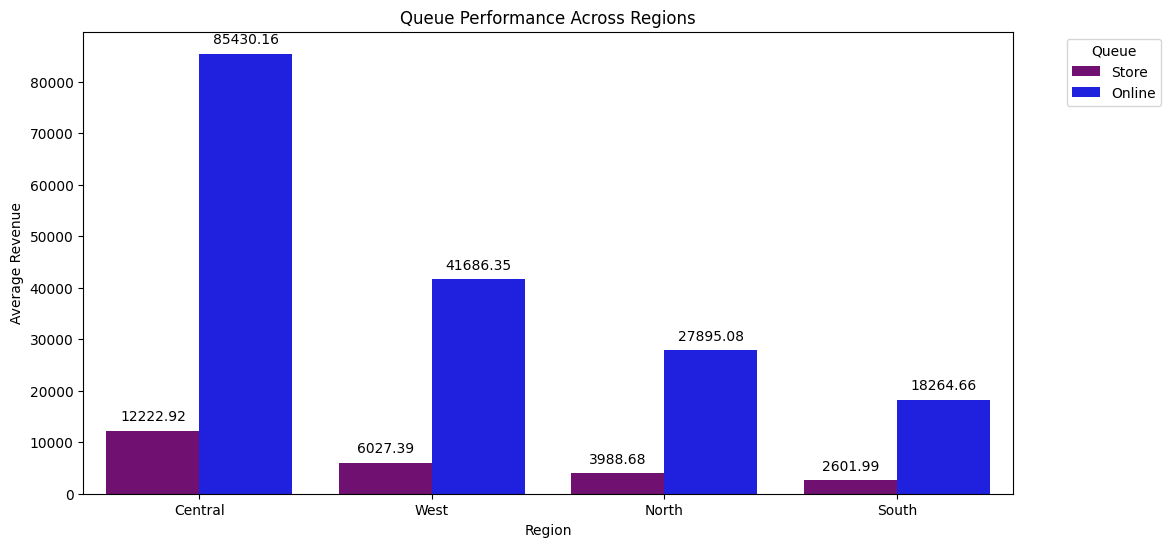

In [ ]:
plt.figure(figsize=(12, 6))

# Set custom colors (green and olive)
custom_palette = {"green": "#4CAF50", "olive": "#808000", "Online": "blue", "Store": "purple"}
sns.barplot(x='Region', y='Revenue', hue='Queue', data=df_revenue, ci=None, palette=custom_palette)

plt.title('Queue Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Revenue')
plt.legend(title='Queue', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding labels to the bars excluding bars with zero values
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [1]:
#Sales Trend

<ipython-input-6-fcbcc93da028>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend_covid = df_sales.groupby(['Quarter', 'Before/After COVID']).sum()['Sales'].unstack()


<Figure size 1200x600 with 0 Axes>

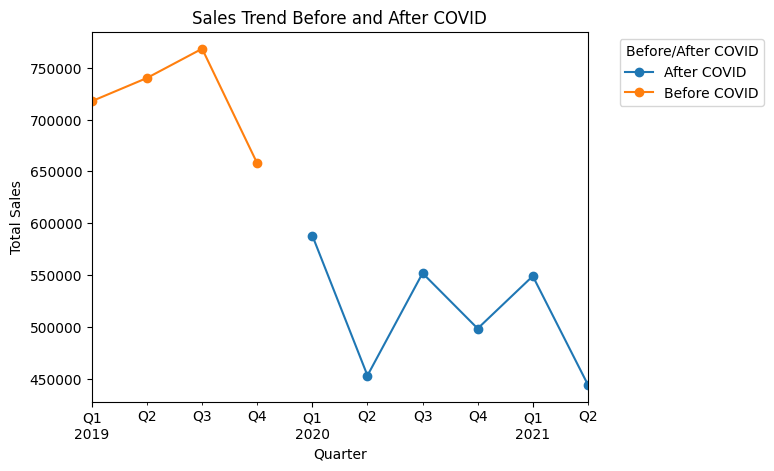

In [ ]:
plt.figure(figsize=(12, 6))

# Extracting the year and quarter from the 'Date' column
df_sales['Year'] = df_sales['Date'].dt.year
df_sales['Quarter'] = df_sales['Date'].dt.to_period("Q")

# Defining the COVID start date
covid_start_date = pd.to_datetime('2020-01-01')

# Creating a new column to indicate Before/After COVID
df_sales['Before/After COVID'] = df_sales['Date'].apply(lambda x: 'Before COVID' if x < covid_start_date else 'After COVID')

# Grouping by quarter and Before/After COVID, calculating the sum of revenue
sales_trend_covid = df_sales.groupby(['Quarter', 'Before/After COVID']).sum()['Sales'].unstack()

# Plotting the linear graph
sales_trend_covid.plot(kind='line', marker='o')

plt.title('Sales Trend Before and After COVID')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Before/After COVID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [2]:
#Sales Trend_Year wise

In [ ]:
import pandas as pd
import plotly.express as px

# Read data
df_sales = pd.read_excel("/content/dataq5_cy.xlsx", sheet_name='Sales')

# Convert 'Date' column to datetime type
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Extract year from the 'Date' column
df_sales['Year'] = df_sales['Date'].dt.year

# Group by year and sum the sales
overall_sales = df_sales.groupby('Year')['Sales'].sum().reset_index()

# Create a simple line chart for overall sales trend
fig = px.line(overall_sales, x='Year', y='Sales',
              title='Overall Sales Trend Over 3 Years',
              labels={'Sales': 'Total Sales Revenue', 'Year': 'Year'})

# Customize the layout if needed
fig.update_layout(xaxis_title='Year', yaxis_title='Total Sales Revenue')

# Show the interactive plot
fig.show()


In [3]:
#State Wise Sales

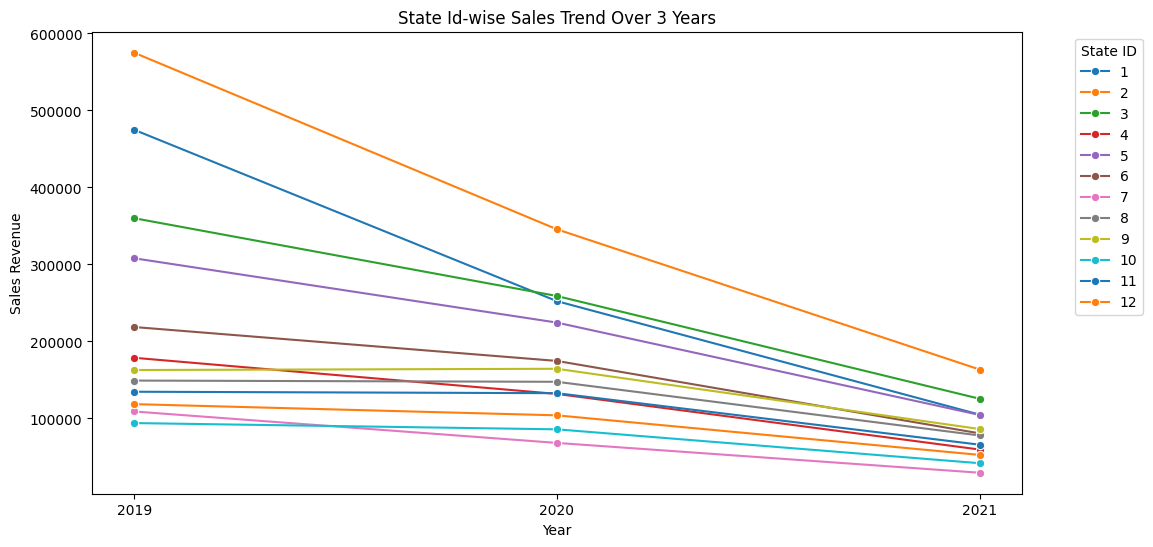

In [ ]:
# Read data
df_sales = pd.read_excel("/content/dataq5_cy.xlsx", sheet_name='Sales')

# Convert 'Date' column to datetime type
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Extract year from the 'Date' column
df_sales['Year'] = df_sales['Date'].dt.year

# Group by State Id and Year, summing the sales
state_yearly_sales = df_sales.groupby(['State Id', 'Year'])['Sales'].sum().reset_index()

# Create a simple line chart for State Id-wise sales trend over 3 years with different colors
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales', hue='State Id', data=state_yearly_sales, marker='o', palette='tab10')
plt.title('State Id-wise Sales Trend Over 3 Years')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks to show only 2019, 2020, and 2021
plt.xticks([2019, 2020, 2021])

plt.show()